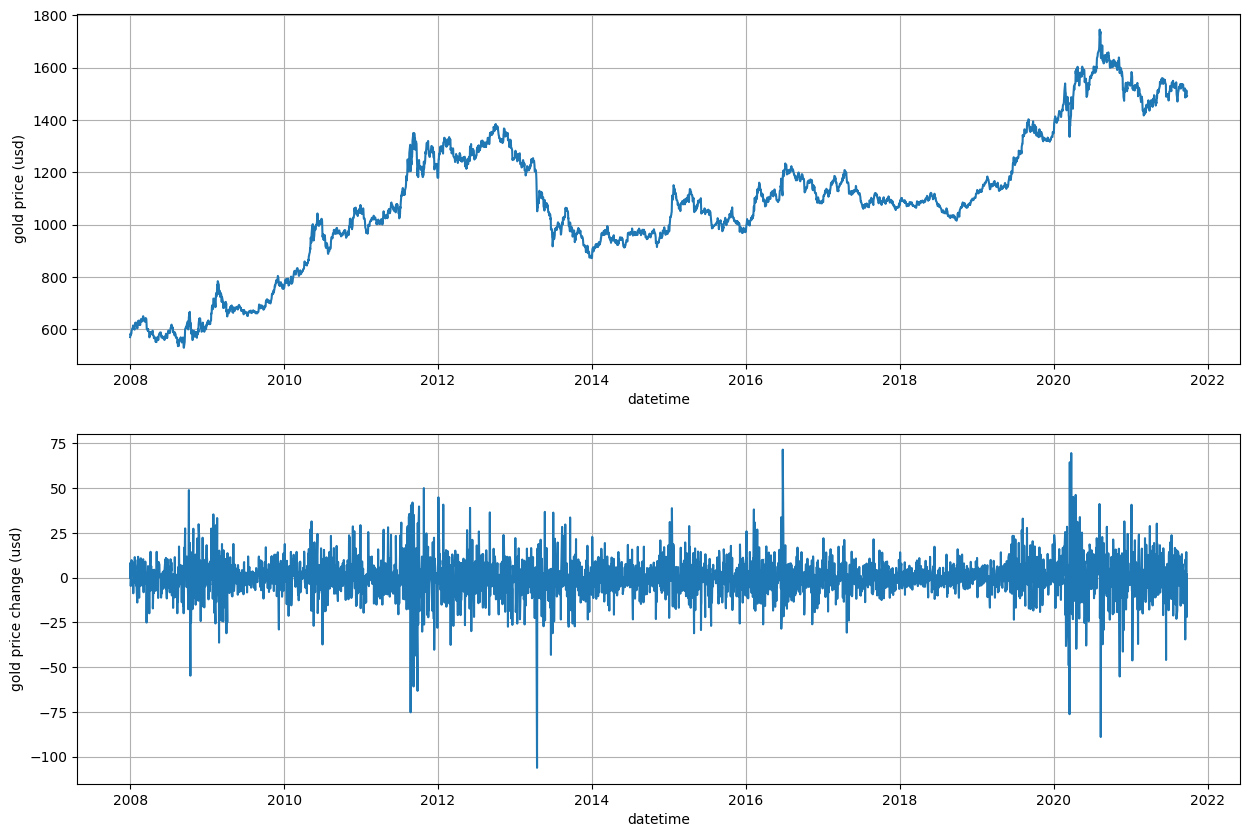

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

data = pd.read_csv(base_dir)

# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])

# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()

# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

In [2]:
data

,datetime,gold_price_usd,gold_price_change
7567,2008-01-01,570.26,0.00
7568,2008-01-02,575.02,4.76
7569,2008-01-03,583.36,8.34
7570,2008-01-04,578.70,-4.66
7571,2008-01-07,583.83,5.13
...,...,...,...
11146,2021-09-20,1499.15,3.07
11147,2021-09-21,1513.45,14.30
11148,2021-09-22,1511.40,-2.05
11149,2021-09-23,1489.43,-21.97


In [4]:
# Use the daily change in gold price as the observed measurements X.
X = data[["gold_price_change"]].values
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 4, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

In [5]:
states

array([0, 2, 1, 3])

In [7]:
print("\nStart probabilities:")
print(model.startprob_)



Start probabilities:
[1.00000000e+00 1.88328966e-71 1.89153434e-19 2.17379768e-27]
